In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from  astropy.table import join
import pandas as pd

from matplotlib import rc
font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)
rc('text', usetex=True)

home = '/home/'

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from spectrophotometricpca.dataprep import *

%aimport spectrophotometricpca

In [5]:
from gasp.photoz import *
from gasp.stats import *

%aimport gasp
%aimport gasp

In [6]:
# https://www.sdss.org/dr16/spectro/lss/

data_elg = Table.read('/home/bl/Astrodata/eBOSScatalogs/eBOSS_ELG_full_ALLdata-vDR16.fits').filled()
data_elg['PLATE'] = data_elg['plate']

ind = data_elg['MJD'] > 0
ind &= data_elg['Z'] > 0
print('Only keeping', np.sum(ind), 'out of', ind.size)
data_elg = data_elg[ind]

print(len(data_elg), 'ELG objects\n', np.array(data_elg.colnames))

data_lrg = Table.read('/home/bl/Astrodata/eBOSScatalogs/eBOSS_LRG_full_ALLdata-vDR16.fits').filled()

ind = data_lrg['MJD'] > 0
ind &= data_lrg['Z'] > 0
print('Only keeping', np.sum(ind), 'out of', ind.size)
data_lrg = data_lrg[ind]

print(len(data_lrg), 'LRG objects\n', np.array(data_lrg.colnames))


data_elg[['MJD', 'PLATE', 'FIBERID']].write(
    '/home/bl/Astrodata/eBOSScatalogs/eBOSS_ELG_full_ALLdata-vDR16_photoIDonly.csv', 
     overwrite=True, format='ascii.csv', comment='#'
)
data_lrg[['MJD', 'PLATE', 'FIBERID']].write(
    '/home/bl/Astrodata/eBOSScatalogs/eBOSS_LRG_full_ALLdata-vDR16_photoIDonly.csv', 
     overwrite=True, format='ascii.csv', comment='#'
)

Only keeping 252818 out of 269178
252818 ELG objects
 ['RA' 'DEC' 'Z' 'WEIGHT_SYSTOT' 'WEIGHT_CP' 'WEIGHT_NOZ' 'NZ' 'WEIGHT_FKP'
 'sector_TSR' 'COMP_BOSS' 'plate_MJD_SSR' 'sector_SSR' 'chunk' 'plate'
 'tile' 'MJD' 'sector' 'ELG_sector' 'sector_area' 'sector_ntiles'
 'sector_tiles' 'INGROUP' 'ELG_INGROUP' 'MULTGROUP' 'EBOSS_TARGET1'
 'BOSSTILE_STATUS' 'TRIMMED' 'brickname' 'decals_objid' 'decals_uniqid'
 'decals_dr' 'type' 'nobs_g' 'nobs_r' 'nobs_z' 'psfdepth_g' 'psfdepth_r'
 'psfdepth_z' 'galdepth_g' 'galdepth_r' 'galdepth_z' 'psfsize_g'
 'psfsize_r' 'psfsize_z' 'g' 'gr' 'rz' 'rw1' 'rw2' 'IMATCH'
 'EBOSS_TARGET_ID' 'hasfiber' 'FIBERID' 'CARTID' 'XFOCAL' 'YFOCAL'
 'plate_rSN2' 'SPEC1_G' 'SPEC1_R' 'SPEC1_I' 'SPEC2_G' 'SPEC2_R' 'SPEC2_I'
 'SN_MEDIAN' 'SN_MEDIAN_ALL' 'plate_MJD_SN_MEDIAN_ALL' 'Z_zQ' 'Z_zCont'
 'Z_ok' 'CHI2' 'DELTACHI2' 'COEFF' 'ZERR' 'ZWARN' 'NPIXELS' 'SPECTYPE'
 'SUBTYPE' 'NCOEFF' 'Z_O2_3728_flux' 'Z_O2_3728_fluxErr' 'fast_id'
 'fast_lmass' 'mskbit' 'comb_galdepth' 'chunk

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


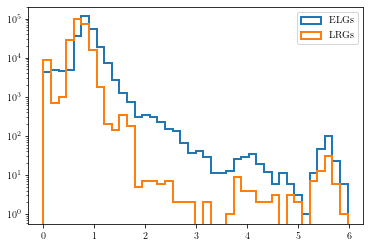

In [7]:
plt.hist(data_elg['Z'], histtype='step', lw=2, bins=40, label='ELGs', log=True);
plt.hist(data_lrg['Z'], histtype='step', lw=2, bins=40, label='LRGs');
plt.legend()

252818 227312


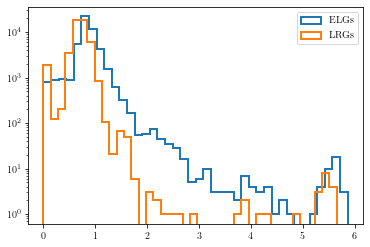

In [8]:
numTraining = 50000

elg_indices = np.random.choice(len(data_elg), numTraining, replace=False)

lrg_indices = np.random.choice(len(data_lrg), numTraining, replace=False)

print(len(data_elg), len(data_lrg))

plt.hist(data_elg['Z'][elg_indices], histtype='step', lw=2, bins=40, label='ELGs', log=True);
plt.hist(data_lrg['Z'][lrg_indices], histtype='step', lw=2, bins=40, label='LRGs');
plt.legend()

In [9]:
if False: # need to write?
    data_elg[['MJD', 'PLATE', 'FIBERID']][elg_indices].write(
        '/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/elgs_uniftrain_photoIDonly.csv', 
         overwrite=True, format='ascii.csv', comment='#'
    )
    data_lrg[['MJD', 'PLATE', 'FIBERID']][lrg_indices].write(
        '/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/lrgs_uniftrain_photoIDonly.csv', 
         overwrite=True, format='ascii.csv', comment='#'
    )

In [10]:
np.min(data_elg['MJD'])

57656

http://skyserver.sdss.org/dr16/en/tools/search/sql.aspx
        

SELECT prim.bestObjId, plate.programname,
    prim.mjd AS PrimMJD, prim.plate AS PrimPlate, prim.fiberID as PrimFiber, prim.z AS PrimZ, 
    other.mjd AS OtherMJD, other.plate AS OtherPlate, other.fiberID as OtherFiber, other.z AS OtherZ
FROM SpecObjAll prim
    JOIN SpecObjAll other ON prim.bestObjId = other.bestObjId
    JOIN platex AS plate ON other.plate = plate.plate AND other.mjd = plate.mjd
WHERE other.bestObjId > 0
    AND prim.sciencePrimary = 1
    AND other.sciencePrimary = 0
    AND prim.instrument = 'BOSS'
    AND other.instrument = 'BOSS'
    AND prim.class = 'GALAXY'
    AND prim.zWarning = 0
    AND other.zWarning = 0
ORDER BY prim.bestObjId


In [11]:
repeatdata = Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/repeated_spectra_pairs.fits').to_pandas()

repeatdata['MJD'] = repeatdata['PrimMJD']
repeatdata['PLATE'] = repeatdata['PrimPlate']
repeatdata['FIBERID'] = repeatdata['PrimFiber']

repeatdata['programname'].value_counts()

b'boss'                           101670
b'eboss'                           23140
b'commissioning'                   11352
b'ELG_SGC'                          8723
b'ELG_NGC'                          4582
b'special_plates_NGC'               3943
b'sequels'                          1189
b'Orion_Taurus'                      353
b'DEEP_QSO'                          277
b'special_plates_S82'                 94
b'boss_lofar'                         89
b'XMMXLL'                             76
b'special_elg'                        75
b'RM'                                 69
b'special_plates_W1'                  34
b'special_sky'                        13
b'special_plates_W3'                   8
b'SEQUELS_ELG'                         8
b'special_plates_TDSS_SPIDERS'         3
Name: programname, dtype: int64

In [12]:
# Actually keeping all!
selected_objects = Table.from_pandas(pd.concat([
    pd.DataFrame({
        'BESTOBJID': repeatdata['bestObjId'].astype(str), 
        'Zr': repeatdata['PrimZ'], 
        'MJD': repeatdata['PrimMJD'], 
        'PLATE': repeatdata['PrimPlate'], 
        'FIBER': repeatdata['PrimFiber'],
        'IsBest': True
    }),
    pd.DataFrame({
        'BESTOBJID': repeatdata['bestObjId'].astype(str), 
        'Zr': repeatdata['OtherZ'], 
        'MJD': repeatdata['OtherMJD'], 
        'PLATE': repeatdata['OtherPlate'], 
        'FIBER': repeatdata['OtherFiber'],
        'IsBest': False
    }) 
], axis=0))
selected_objects.write('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/repeated_flattened.fits', overwrite=True)

In [13]:
repeatdata = Table.from_pandas(repeatdata)

-6504.4346 80307.87
-0.06511941 51.720867


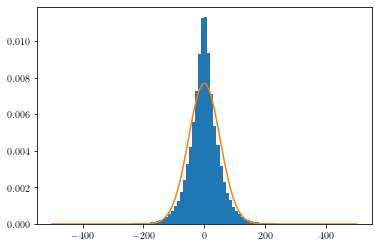

In [14]:
dv = (repeatdata['PrimZ'] - repeatdata['OtherZ']) * 3e5 / (1 + repeatdata['PrimZ'])
x = np.linspace(-5e2, 5e2, 100)
from scipy.stats import norm
ind = np.abs(dv) < 500
print(np.mean(dv), np.std(dv))
print(np.mean(dv[ind]), np.std(dv[ind]))
y = norm.pdf(x, loc=np.mean(dv[ind]), scale=np.std(dv[ind]))
plt.hist(dv[ind], range=[-5e2, 5e2], bins=100, log=False, density=True);
plt.plot(x, y)

In [15]:

data_elg_p = Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/SpecPhotoAll_ELGs.csv')
data_elg_p['PLATE'] = data_elg_p['plate']
data_elg_p['FIBERID'] = data_elg_p['fiberID']
data_elg_p['MJD'] = data_elg_p['mjd']
data_elg_sp = join(data_elg_p, data_elg, keys=['MJD', 'PLATE', 'FIBERID'])

print(len(data_elg_p), len(data_elg_sp), 'ELG objects out of', len(data_lrg))
del data_elg_sp

data_lrg_p = Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/SpecPhotoAll_LRGs.csv')
data_lrg_p['PLATE'] = data_lrg_p['plate']
data_lrg_p['FIBERID'] = data_lrg_p['fiberID']
data_lrg_p['MJD'] = data_lrg_p['mjd']
data_lrg_sp = join(data_lrg_p, data_lrg, keys=['MJD', 'PLATE', 'FIBERID'])

print(len(data_lrg_p), len(data_lrg_sp), 'LRG objects out of', len(data_lrg))
del data_lrg_sp

255039 251312 ELG objects out of 227312
241647 227312 LRG objects out of 227312


In [16]:
# check which IDS to use and fetch data directly from Photo table

In [17]:
from astropy.table import unique
selected_objects = unique(Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/repeated_flattened.fits'))
selected_objects['OBJID_TARGETING'] = selected_objects['BESTOBJID'].astype(int)
selected_objects['FIBERID'] = selected_objects['FIBER']
print(len(selected_objects), 'repeated objects\n', np.array(selected_objects.colnames))

291852 repeated objects
 ['BESTOBJID' 'Zr' 'MJD' 'PLATE' 'FIBER' 'IsBest' 'OBJID_TARGETING'
 'FIBERID']


In [18]:
print(len(selected_objects), len(unique(selected_objects)))

291852 291852


['RUN' 'CAMCOL' 'FIELD' 'ID' 'RERUN' 'FIBER2MAG' 'RA' 'DEC' 'PSFFLUX'
 'PSFFLUX_IVAR' 'EXTINCTION' 'FIBER2FLUX' 'FIBER2FLUX_IVAR' 'MODELFLUX'
 'MODELFLUX_IVAR' 'MODELMAG' 'W1_MAG' 'W1_MAG_ERR' 'W1_NANOMAGGIES'
 'W1_NANOMAGGIES_IVAR' 'W2_NANOMAGGIES' 'W2_NANOMAGGIES_IVAR'
 'OBJID_TARGETING' 'CHUNK' 'TILE' 'LOCATIONID' 'NTILES' 'BOSSTILE_STATUS'
 'TRIMMED' 'IDUPLICATE' 'IGEOMETRY' 'INGROUP' 'FIRSTGROUP' 'MULTGROUP'
 'NEXTGROUP' 'SECTOR' 'LRG_ID' 'IMATCH' 'CHUNKspec' 'PLATESN2' 'XFOCAL'
 'YFOCAL' 'BOSS_TARGET1' 'PLATE' 'TILEspec' 'MJD' 'FIBERID' 'CLASS' 'Z'
 'ZWARNING' 'SN_MEDIAN_ALL' 'SPEC1_G' 'SPEC1_R' 'SPEC1_I' 'SPEC2_G'
 'SPEC2_R' 'SPEC2_I' 'TARGETID' 'CHI2' 'COEFF' 'Z_REDROCK' 'ZERR'
 'ZWARNING_REDROCK' 'NPIXELS' 'CLASS_REDROCK' 'SUBTYPE' 'NCOEFF'
 'DELTACHI2' 'sector_SSR' 'WEIGHT_CP' 'sector_TSR' 'COMP_BOSS']
ELG catalogs: 252818 255039
Cross-matched repeated observations: 13607 13728 9955


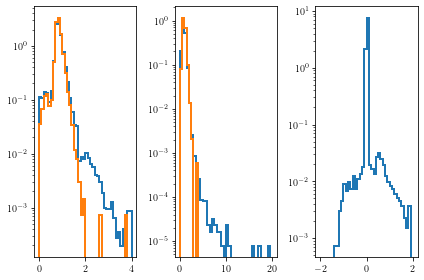

In [19]:

print(np.array(data_lrg.colnames))

found = unique(join(data_elg, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))
found2 = unique(join(data_elg_p, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))
found3 = unique(join(data_elg, repeatdata, keys=['MJD', 'PLATE', 'FIBERID']))
print('ELG catalogs:', len(data_elg), len(data_elg_p))
print('Cross-matched repeated observations:', len(found), len(found2), len(found3))
found2[['MJD', 'PLATE', 'FIBERID']].write('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/lss_elgs_repeated.fits', overwrite=True)

kwargs = {
    'log': True,
    'bins': 40,
    'histtype': 'step',
    'density': True,
    'lw': 2
}
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_elg['Z'], **kwargs, range=[0, 4])
axs[1].hist(data_elg['SN_MEDIAN_ALL'], **kwargs, range=[0, 20])
axs[0].hist(found['Z'], **kwargs, range=[0, 4])
axs[1].hist(found['SN_MEDIAN_ALL'], **kwargs, range=[0, 20])
axs[2].hist(found['Zr']-found['Z'], **kwargs, range=[-2, 2])
fig.tight_layout()

In [20]:
def dv_statistics(z1, z2):
    dv = (z1 - z2)*3e5 / (1 + z1)
    
    print('Mean / median:', np.mean(dv), np.me)

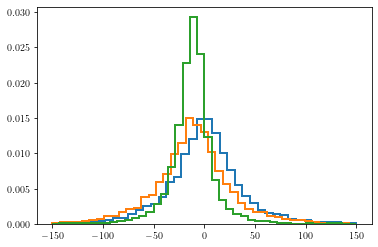

In [21]:
kwargs = {
    'log': False,
    'histtype': 'step',
    'density': True,
    'lw': 2,
    'range': [-150, 150]
}
plt.hist((found3['PrimZ']-found3['OtherZ'])*3e5/(1 + found3['PrimZ']), **kwargs, bins=40);
plt.hist((found3['Z']-found3['OtherZ'])*3e5/(1 + found3['Z']), **kwargs, bins=41);
plt.hist((found3['Z']-found3['PrimZ'])*3e5/(1 + found3['PrimZ']), **kwargs, bins=42);

['RA' 'DEC' 'Z' 'WEIGHT_SYSTOT' 'WEIGHT_CP' 'WEIGHT_NOZ' 'NZ' 'WEIGHT_FKP'
 'sector_TSR' 'COMP_BOSS' 'plate_MJD_SSR' 'sector_SSR' 'chunk' 'plate'
 'tile' 'MJD' 'sector' 'ELG_sector' 'sector_area' 'sector_ntiles'
 'sector_tiles' 'INGROUP' 'ELG_INGROUP' 'MULTGROUP' 'EBOSS_TARGET1'
 'BOSSTILE_STATUS' 'TRIMMED' 'brickname' 'decals_objid' 'decals_uniqid'
 'decals_dr' 'type' 'nobs_g' 'nobs_r' 'nobs_z' 'psfdepth_g' 'psfdepth_r'
 'psfdepth_z' 'galdepth_g' 'galdepth_r' 'galdepth_z' 'psfsize_g'
 'psfsize_r' 'psfsize_z' 'g' 'gr' 'rz' 'rw1' 'rw2' 'IMATCH'
 'EBOSS_TARGET_ID' 'hasfiber' 'FIBERID' 'CARTID' 'XFOCAL' 'YFOCAL'
 'plate_rSN2' 'SPEC1_G' 'SPEC1_R' 'SPEC1_I' 'SPEC2_G' 'SPEC2_R' 'SPEC2_I'
 'SN_MEDIAN' 'SN_MEDIAN_ALL' 'plate_MJD_SN_MEDIAN_ALL' 'Z_zQ' 'Z_zCont'
 'Z_ok' 'CHI2' 'DELTACHI2' 'COEFF' 'ZERR' 'ZWARN' 'NPIXELS' 'SPECTYPE'
 'SUBTYPE' 'NCOEFF' 'Z_O2_3728_flux' 'Z_O2_3728_fluxErr' 'fast_id'
 'fast_lmass' 'mskbit' 'comb_galdepth' 'chunk_z' 'PLATE']
LRG catalogs: 227312 241647
Cross-matched

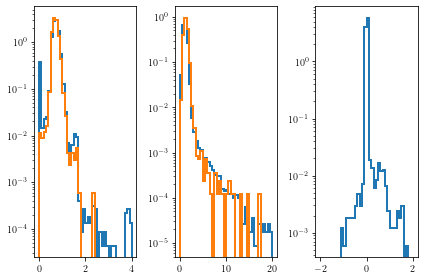

In [22]:

print(np.array(data_elg.colnames))

#found = join(data_lrg, selected_objects[['OBJID_TARGETING']])
found = unique(join(data_lrg, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))
found2 = unique(join(data_lrg_p, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))
found3 = unique(join(data_lrg, repeatdata, keys=['MJD', 'PLATE', 'FIBERID']))
print('LRG catalogs:', len(data_lrg), len(data_lrg_p))
print('Cross-matched repeated observations:', len(found), len(found2), len(found3))
found2[['MJD', 'PLATE', 'FIBERID']].write('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/lss_lrgs_repeated.fits', overwrite=True)

kwargs = {
    'log': True,
    'bins': 40,
    'histtype': 'step',
    'density': True,
    'lw': 2
}
fig, axs = plt.subplots(1, 3)
axs[0].hist(data_lrg['Z'], **kwargs, range=[0, 4])
axs[1].hist(data_lrg['SN_MEDIAN_ALL'], **kwargs, range=[0, 20])
axs[0].hist(found['Z'], **kwargs, range=[0, 4])
axs[1].hist(found['SN_MEDIAN_ALL'], **kwargs, range=[0, 20])
axs[2].hist(found['Zr']-found['Z'], **kwargs, range=[-2, 2])
fig.tight_layout()

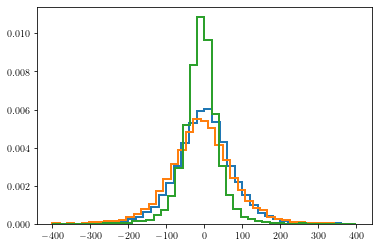

In [23]:
kwargs = {
    'log': False,
    'histtype': 'step',
    'density': True,
    'lw': 2,
    'range': [-400, 400]
}
plt.hist((found3['PrimZ']-found3['OtherZ'])*3e5/(1 + found3['PrimZ']), **kwargs, bins=40);
plt.hist((found3['Z']-found3['OtherZ'])*3e5/(1 + found3['Z']), **kwargs, bins=41);
plt.hist((found3['Z']-found3['PrimZ'])*3e5/(1 + found3['PrimZ']), **kwargs, bins=42); 

In [24]:
# Constructing training and testing sets

In [25]:
# What photometry
# https://www.sdss.org/dr16/algorithms/flags_detail/
# https://www.astro.princeton.edu/~rhl/flags.html


-- The Clean Photometry sample query above showed how
-- to select only objects for which SDSS-III imaging pipeline has declared
-- the photometry clean. Usually, it is sufficient to search only the CLEAN flag;
-- but in some contexts, it is important to know what conditions
-- are required for the CLEAN flag to be set. The imaging pipeline sets the
-- CLEAN flag based on the values of other flags; these necessary values are
-- different for stars and galaxies. The version of this sample query for stars
-- can be found in the Clean photometry - Stars sample query.

-- For galaxies (i.e. not using PSF mags): Again use only PRIMARY objects. Other
-- cuts are nearly the same, but remove the cut on EDGE. Possibly also remove
-- the cut on INTERP flags.

-- In this query, the human-readable flag names (through calls to the flag
-- functions have been replaced with explicit values. Using explicit values for flags
-- makes the queries run much faster.

SELECT TOP 10 u,g,r,i,z,ra,dec, flags_r
FROM Galaxy
WHERE
ra BETWEEN 180 and 181 AND dec BETWEEN -0.5 and 0.5
AND ((flags_r & 0x10000000) != 0)
-- detected in BINNED1
AND ((flags_r & 0x8100000c00a0) = 0)
-- not NOPROFILE, PEAKCENTER, NOTCHECKED, PSF_FLUX_INTERP, SATURATED,
-- or BAD_COUNTS_ERROR.
-- if you want to accept objects with interpolation problems for PSF mags,
-- change this to: AND ((flags_r & 0x800a0) = 0)
AND (((flags_r & 0x400000000000) = 0) or (psfmagerr_r <= 0.2))
-- not DEBLEND_NOPEAK or small PSF error
-- (substitute psfmagerr in other band as appropriate)
AND (((flags_r & 0x100000000000) = 0) or (flags_r & 0x1000) = 0)
-- not INTERP_CENTER or not COSMIC_RAY - - omit this AND clause if you want to
-- accept objects with interpolation problems for PSF mags.

In [26]:
zmax = 1.8

(
    new_logwave_rest_centers,
    logwavegrid_z,
    lamspec_waveoffset,
) = build_sdss_grids(zmax)


In [27]:
sel_lss_elgs = Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/elgs_uniftrain_photoIDonly.csv')
sel_lss_lrgs = Table.read('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/lrgs_uniftrain_photoIDonly.csv')

In [28]:

lssdata_elg_sp = unique(join(data_elg_p, sel_lss_elgs, keys=['MJD', 'PLATE', 'FIBERID']))

lssdata_lrg_sp = unique(join(data_lrg_p, sel_lss_lrgs, keys=['MJD', 'PLATE', 'FIBERID']))

repdata_elg_sp = unique(join(data_elg_p, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))

repdata_lrg_sp = unique(join(data_lrg_p, selected_objects, keys=['MJD', 'PLATE', 'FIBERID']))

print('Number of lss ELGs', len(lssdata_elg_sp))
print('Number of lss LRGs', len(lssdata_lrg_sp))
print('Number of repeat ELGs', len(repdata_elg_sp))
print('Number of repeat LRGs', len(repdata_lrg_sp))

fulldata = pd.concat([
    lssdata_elg_sp.to_pandas(), 
    lssdata_lrg_sp.to_pandas(),
    repdata_elg_sp.to_pandas(), 
    repdata_lrg_sp.to_pandas()
])

n1 = len(lssdata_elg_sp) + len(lssdata_lrg_sp)
n2 = len(repdata_elg_sp) + len(repdata_lrg_sp)

indices_train = np.arange(0, n1)
indices_valid = np.arange(n1+1, n1+n2)

Number of lss ELGs 49669
Number of lss LRGs 50000
Number of repeat ELGs 13728
Number of repeat LRGs 16832


In [29]:
repdata_elg_sp.colnames

['specObjID',
 'mjd',
 'plate',
 'tile',
 'fiberID',
 'z',
 'zErr',
 'class',
 'subClass',
 'zWarning',
 'ra',
 'dec',
 'cx',
 'cy',
 'cz',
 'htmID',
 'sciencePrimary',
 'legacyPrimary',
 'seguePrimary',
 'segue1Primary',
 'segue2Primary',
 'bossPrimary',
 'sdssPrimary',
 'survey',
 'programname',
 'legacy_target1',
 'legacy_target2',
 'special_target1',
 'special_target2',
 'segue1_target1',
 'segue1_target2',
 'segue2_target1',
 'segue2_target2',
 'boss_target1',
 'ancillary_target1',
 'ancillary_target2',
 'plateID',
 'sourceType',
 'targetObjID',
 'objID',
 'skyVersion',
 'run',
 'rerun',
 'camcol',
 'field',
 'obj',
 'mode',
 'nChild',
 'type',
 'flags',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'petroMag_u',
 'petro

In [30]:
len(fulldata)

130229

In [32]:
correct_for_extinction = True

if correct_for_extinction:
    
    from astropy.coordinates import SkyCoord
    from dustmaps.sfd import SFDQuery

    from dustmaps.config import config
    config['data_dir'] = '.'
    import dustmaps.sfd
    dustmaps.sfd.fetch()
    
    coords = SkyCoord(fulldata['ra'], fulldata['dec'], frame='icrs', unit='deg')
    sfd = SFDQuery()
    ebv = sfd(coords)
    
else:
    
    ebv = 0

fulldata['EBV'] = ebv

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [33]:
fulldata[fulldata == 'null'] = np.nan
fluxes, fluxErrs = load_fluxes(fulldata)

/home/bl/Dropbox/repos/spectro-photometric-pca/spectrophotometricpca/dataprep.py:70: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Av = ebv[:, None] * np.array(extinctionCoefficients)[None, :]


In [34]:
ind = np.all(np.isfinite(fluxes), axis=1)
ind &= np.all(np.isfinite(fluxes), axis=1)
indices = np.where(ind)[0]#np.random.choice(len(fulldata), 34364, replace=False)
print(indices.size, ind.size)

122902 130229


In [35]:
root = home+'bl/Astrodata/sdss_spectra/'
fullroot = root+'sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/'


In [36]:
fulldata['Z'] = fulldata['z']

In [37]:
transfer_redshift_grid,\
    processed_indices, processed_redshifts, processed_spec, processed_spec_ivar,\
    processed_spec_off, processed_index_transfer_redshift, processed_index_wave,\
    n_valid_pixels, n_valid_pixels_orig, chi2s_sdss =\
        loop(
            indices, fulldata, fullroot, new_logwave_rest_centers,
            logwavegrid_z, correct_for_extinction=correct_for_extinction,
            min_valid_pixels = 1000,
            )

/home/bl/Dropbox/repos/spectro-photometric-pca/spectrophotometricpca/dataprep.py:339: RuntimeWarning: overflow encountered in power
  spec = extinction.remove(extinction_sed, spec)
/home/bl/Dropbox/repos/spectro-photometric-pca/spectrophotometricpca/dataprep.py:340: RuntimeWarning: overflow encountered in power
  spec_off = extinction.remove(extinction_sed, spec_off)


Processed 1000 spectra in 0.24 minutes (0.015 sec per object)
Valid spectra: 995 out of 1000
> Estimated remaining time: >> 29.83 minutes << for 121902 objects
Processed 2000 spectra in 0.48 minutes (0.014 sec per object)
Valid spectra: 1989 out of 2000
> Estimated remaining time: >> 28.86 minutes << for 120902 objects
Processed 3000 spectra in 0.71 minutes (0.014 sec per object)
Valid spectra: 2985 out of 3000
> Estimated remaining time: >> 28.23 minutes << for 119902 objects
Processed 4000 spectra in 0.94 minutes (0.014 sec per object)
Valid spectra: 3981 out of 4000
> Estimated remaining time: >> 27.87 minutes << for 118902 objects
Processed 5000 spectra in 1.16 minutes (0.014 sec per object)
Valid spectra: 4973 out of 5000
> Estimated remaining time: >> 27.32 minutes << for 117902 objects
Processed 6000 spectra in 1.40 minutes (0.014 sec per object)
Valid spectra: 5966 out of 6000
> Estimated remaining time: >> 27.20 minutes << for 116902 objects
Processed 7000 spectra in 1.61 minu

Processed 53000 spectra in 8.92 minutes (0.010 sec per object)
Valid spectra: 52749 out of 53000
> Estimated remaining time: >> 11.76 minutes << for 69902 objects
Processed 54000 spectra in 9.14 minutes (0.010 sec per object)
Valid spectra: 53747 out of 54000
> Estimated remaining time: >> 11.67 minutes << for 68902 objects
Processed 55000 spectra in 9.32 minutes (0.010 sec per object)
Valid spectra: 54743 out of 55000
> Estimated remaining time: >> 11.50 minutes << for 67902 objects
Processed 56000 spectra in 9.52 minutes (0.010 sec per object)
Valid spectra: 55738 out of 56000
> Estimated remaining time: >> 11.38 minutes << for 66902 objects
Processed 57000 spectra in 9.72 minutes (0.010 sec per object)
Valid spectra: 56734 out of 57000
> Estimated remaining time: >> 11.24 minutes << for 65902 objects
Processed 58000 spectra in 9.95 minutes (0.010 sec per object)
Valid spectra: 57730 out of 58000
> Estimated remaining time: >> 11.13 minutes << for 64902 objects
Processed 59000 spectr

Processed 105000 spectra in 17.31 minutes (0.010 sec per object)
Valid spectra: 104437 out of 105000
> Estimated remaining time: >> 2.95 minutes << for 17902 objects
Processed 106000 spectra in 17.50 minutes (0.010 sec per object)
Valid spectra: 105420 out of 106000
> Estimated remaining time: >> 2.79 minutes << for 16902 objects
Processed 107000 spectra in 17.72 minutes (0.010 sec per object)
Valid spectra: 106418 out of 107000
> Estimated remaining time: >> 2.63 minutes << for 15902 objects
Processed 108000 spectra in 17.94 minutes (0.010 sec per object)
Valid spectra: 107418 out of 108000
> Estimated remaining time: >> 2.47 minutes << for 14902 objects
Processed 109000 spectra in 18.16 minutes (0.010 sec per object)
Valid spectra: 108416 out of 109000
> Estimated remaining time: >> 2.32 minutes << for 13902 objects
Processed 110000 spectra in 18.37 minutes (0.010 sec per object)
Valid spectra: 109414 out of 110000
> Estimated remaining time: >> 2.15 minutes << for 12902 objects
Proc

In [38]:
processed_indices.size

122283

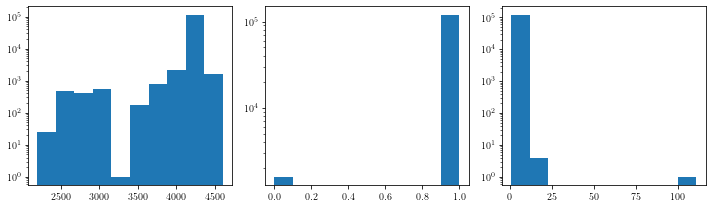

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].hist(n_valid_pixels, log=True)
axs[1].hist(n_valid_pixels_orig - n_valid_pixels, log=True)
axs[2].hist(chi2s_sdss / n_valid_pixels, log=True)
fig.tight_layout()

In [40]:
# need to differenciate between masked values and truncated array.

In [41]:
np.array(fulldata.columns)

array(['specObjID', 'mjd', 'plate', 'tile', 'fiberID', 'z', 'zErr',
       'class', 'subClass', 'zWarning', 'ra', 'dec', 'cx', 'cy', 'cz',
       'htmID', 'sciencePrimary', 'legacyPrimary', 'seguePrimary',
       'segue1Primary', 'segue2Primary', 'bossPrimary', 'sdssPrimary',
       'survey', 'programname', 'legacy_target1', 'legacy_target2',
       'special_target1', 'special_target2', 'segue1_target1',
       'segue1_target2', 'segue2_target1', 'segue2_target2',
       'boss_target1', 'ancillary_target1', 'ancillary_target2',
       'plateID', 'sourceType', 'targetObjID', 'objID', 'skyVersion',
       'run', 'rerun', 'camcol', 'field', 'obj', 'mode', 'nChild', 'type',
       'flags', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r',
       'psfMagErr_i', 'psfMagErr_z', 'fiberMag_u', 'fiberMag_g',
       'fiberMag_r', 'fiberMag_i', 'fiberMag_z', 'fiberMagErr_u',
       'fiberMagErr_g', 'fiberMagErr_r', 'fiberMagErr_i', 'fib

In [42]:
fluxes = fluxes[processed_indices, :]
fluxErrs = fluxErrs[processed_indices, :] # restrict to processed spectra 
flux_ivars = fluxErrs ** -0.5

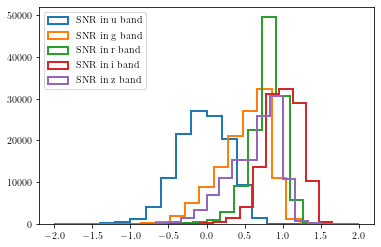

In [43]:
for i, b in enumerate(['u', 'g', 'r', 'i', 'z']):
    plt.hist(np.log10(fluxes[:, i]/fluxErrs[:, i]), label='SNR in '+b+' band', 
             histtype='step', range=[-2, 2], lw=2, bins=20+i);
plt.legend(loc='upper left')

In [44]:
# process filters and create transfer function

from sedpy import observate # TODO: replace with gasp routines

filternames = ["sdss_" + b +'0' for b in ['u', 'g', 'r', 'i', 'z']]
filterdir = "/home/bl/Dropbox/repos/sedpy/sedpy/data/filters"
filt_list = observate.load_filters(filternames, directory=filterdir)

lam_phot_eff = []
lam_phot_size_eff = []
for filt in filt_list:
    x, y = filt.wavelength, filt.transmission
    mn = np.average(x, weights=y)
    lam_phot_eff.append(mn)
    lam_phot_size_eff.append(np.average((x-mn)**2.0, weights=y)**0.5)
    
print(lam_phot_eff)
print(lam_phot_size_eff)

# convert from 1e-17 cgs to nanomaggies in AB system
unit_spec = 1e-17
unit_phot = 1e-9 * 3631
unit_change = unit_phot / unit_spec

wave_rest_interp = 10**new_logwave_rest_centers

transfermatrix_phot, redshift_factors = \
    build_restframe_photometric_transferfunction(transfer_redshift_grid, wave_rest_interp, filt_list, f_lambda=True)

transfermatrix_phot *= unit_change #* redshift_factors[:, None, None]

[3561.8199999999993, 4718.8363303870765, 6185.017045719891, 7500.492347873901, 8961.265536723164]
[192.41262738954364, 388.3271263492239, 343.86345175039276, 381.77074669202733, 525.0183559867379]


In [45]:
input_dir = '/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/'

indices_train_found = np.where(np.in1d(processed_indices, indices_train))[0]
indices_valid_found = np.where(np.in1d(processed_indices, indices_valid))[0]
# filter based on what were found!
np.save(input_dir + "/indices_train", indices_train_found)
np.save(input_dir + "/indices_valid", indices_valid_found)
print("Size of training before search:", indices_train.size)
print("Size of training after search: ", indices_train_found.size)
print("Size of validation before search:", indices_valid.size)
print("Size of validation after search: ", indices_valid_found.size)

Size of training before search: 99669
Size of training after search:  91936
Size of validation before search: 30559
Size of validation after search:  30346


In [46]:
np.min(indices_valid_found), np.max(indices_valid_found), processed_spec.shape

(91937, 122282, (122283, 4700))

In [47]:
save_spectrophotometry(
    input_dir,
    processed_redshifts, lamspec_waveoffset, 
    processed_index_wave, processed_index_transfer_redshift,
    wave_rest_interp, lam_phot_eff, lam_phot_size_eff, 
    transfermatrix_phot, transfer_redshift_grid,
    processed_spec, processed_spec_off, processed_spec_ivar, chi2s_sdss, 
    fluxes, flux_ivars
)

saved transferfunctions
saved seds
saved photometry
all done


In [52]:
fulldata.iloc[processed_indices].to_csv('/home/bl/Dropbox/repos/spectro-photometric-pca/data/dr16eboss/fulldata.csv')

In [ ]:
%pwd

In [ ]:
# Find which observations are repeated ones 
# and store pairs of indices so that dv can easily be calculated.
